In [1]:
import os
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

import warnings
warnings.filterwarnings("ignore")

# T003 DigitalEnergy - Assets Preview

### Input

In [2]:
#SET BEFORE RUNNING:
#targets:
DATADIR = "../../datas"
ASSET_TYPE = "pv"   #common part of the various CSVs name

#chart zoom:
DAY_START = datetime.strptime("2016-07-11 00:00", '%Y-%m-%d %H:%M')
DAY_END = datetime.strptime("2016-07-13 23:59", '%Y-%m-%d %H:%M')

### Data preparation

Preparation of a DataFrame with the data recorded for ALL devices in the dataset of the selected ASSET_TYPE.

All data are converted to incremental values.

In [4]:
#Get data:
dataframes = []
plants = os.listdir(f"{DATADIR}")
plants.remove("README.md")
plants.sort()
for plant in plants:
    files = os.listdir(f"{DATADIR}/{plant}")
    files.sort()
    for el in files:
        if ASSET_TYPE in el:
            dev = el[:-4] #drop "DE_KN" and ".csv" from filename
            print(dev)
            df = pd.read_csv(f"{DATADIR}/{plant}/{el}")
            df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'], format='%Y-%m-%d %H:%M:%S')
            #get incremental values:
            df[dev] = df[dev].diff()
            df.rename(columns={"utc_timestamp": "timestamp"}, inplace=True)
            df.set_index('timestamp', drop=True, inplace=True)
            dataframes.append(df)

data = pd.DataFrame().join(dataframes, how="outer").fillna(0)
data.sort_values(by='timestamp', inplace=True)

#set global:
DEVICES = list(data.columns)

data.head(10)

DE_KN_industrial1_pv_1
DE_KN_industrial1_pv_2
DE_KN_industrial2_pv
DE_KN_industrial3_pv_facade
DE_KN_industrial3_pv_roof
DE_KN_residential1_pv
DE_KN_residential3_pv
DE_KN_residential4_pv
DE_KN_residential6_pv


,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv
timestamp,,,,,,,,,
2015-05-21 15:39:00,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0
2015-05-21 15:40:00,0.0,0.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0
2015-05-21 15:41:00,0.0,0.0,0.0,0.0,0.0,0.017,0.0,0.0,0.0
2015-05-21 15:42:00,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0
2015-05-21 15:43:00,0.0,0.0,0.0,0.0,0.0,0.007,0.0,0.0,0.0
2015-05-21 15:44:00,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0
2015-05-21 15:45:00,0.0,0.0,0.0,0.0,0.0,0.007,0.0,0.0,0.0
2015-05-21 15:46:00,0.0,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0
2015-05-21 15:47:00,0.0,0.0,0.0,0.0,0.0,0.007,0.0,0.0,0.0


Check dates validity (selected time window must be within the operational timeframe of the selected plant):

In [5]:
#check dates validity:
start_data = min(data.index)
end_data = max(data.index)
if start_data <= DAY_START:
    print(f"Start date ok.")
else:
    print(f"ERRORE: la data di inizio dei grafici non può essere precedente a {start_data}.")

if end_data >= DAY_END:
    print(f"End date ok.")
else:
    print(f"ERRORE: la data di fine dei grafici non può essere successiva a {end_data}.")

Start date ok.
End date ok.


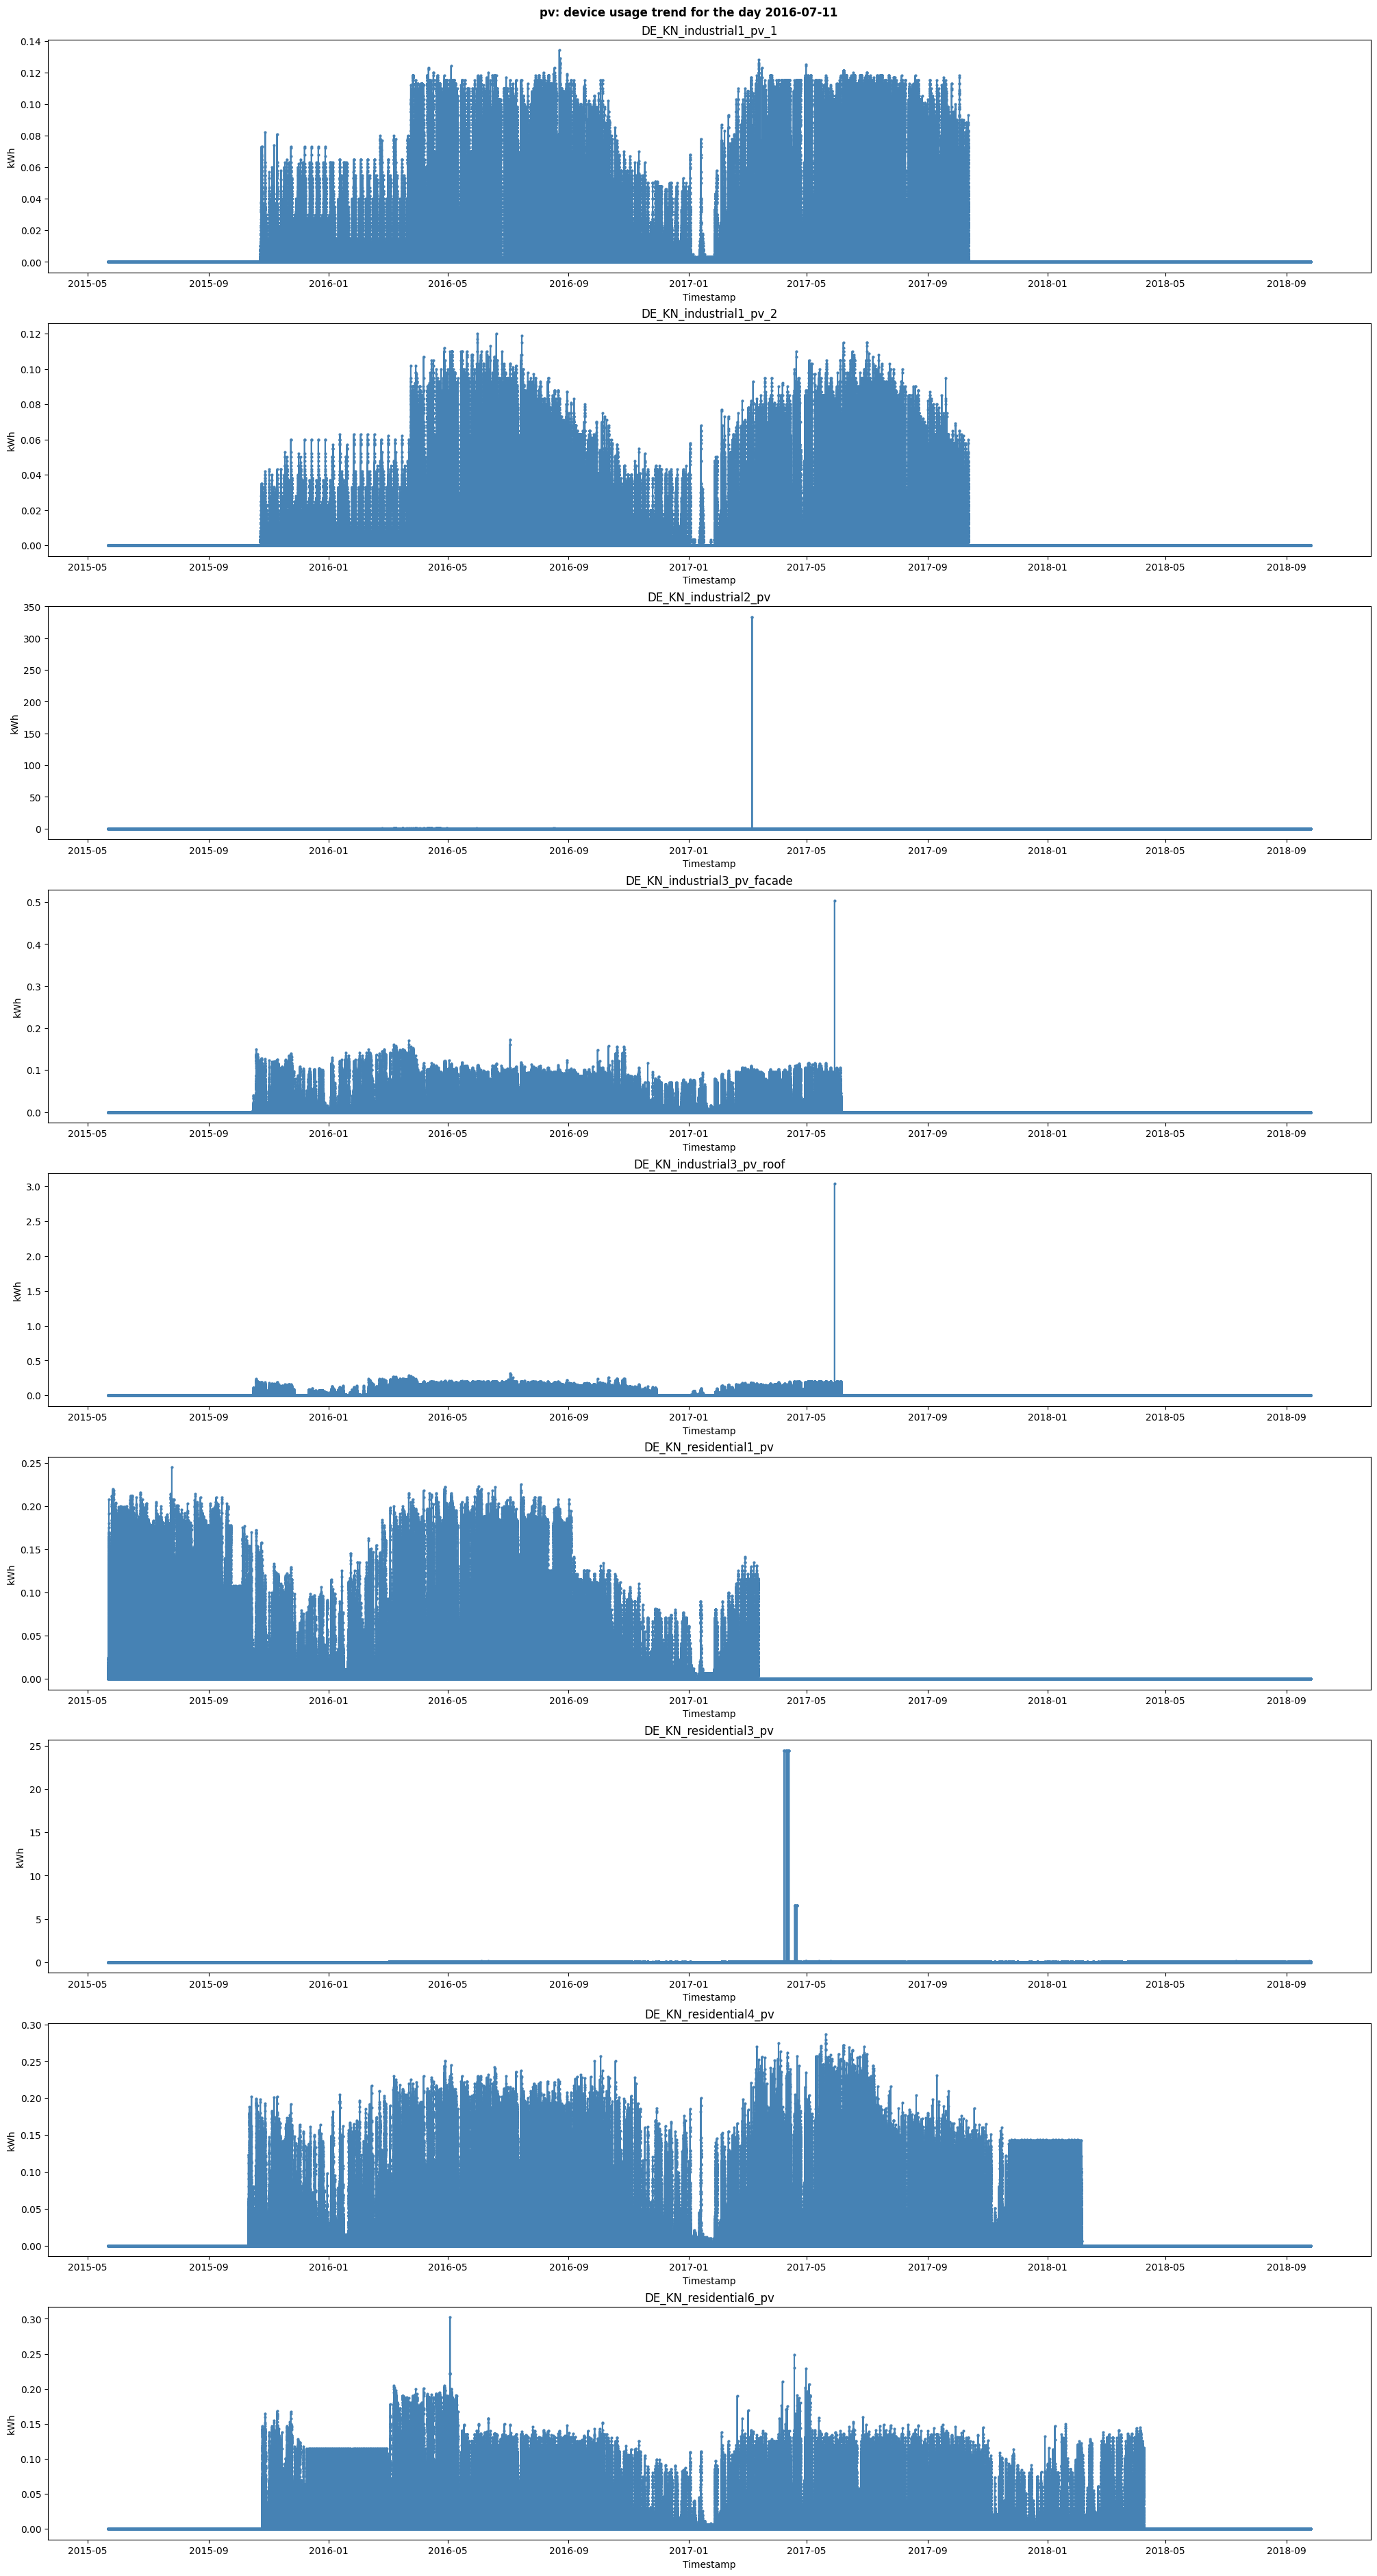

In [6]:
fig, subs = plt.subplots(len(DEVICES), 1, figsize=(1920/96, (400*len(DEVICES))/96), constrained_layout=True)
fig.suptitle(f"{ASSET_TYPE}: device usage trend for the day {str(DAY_START).split()[0]}", fontsize=12, fontweight='bold')

for dev in DEVICES:
    if len(DEVICES) == 1:
        sub1 = subs
    else:
        sub1 = subs[DEVICES.index(dev)]
    sub1.plot(data.index, data[dev], 'steelblue', linewidth=1.5, marker='o', markersize=2)
    sub1.set_title(dev)
    sub1.set_xlabel(f"Timestamp")
    sub1.set_ylabel("kWh")

plt.show()

Create timeslice of the Plant data for the selected time window:

In [7]:
#TIME SLICING:
filt = data.reset_index()
filt = filt.loc[(filt['timestamp'] >= DAY_START) & (filt['timestamp'] <= DAY_END)]
filt['timestamp'] = pd.to_datetime(filt['timestamp'], format='%Y-%m-%d %H:%M')
#filt.head(10)

### Preview

Plot the data for the selected time window:

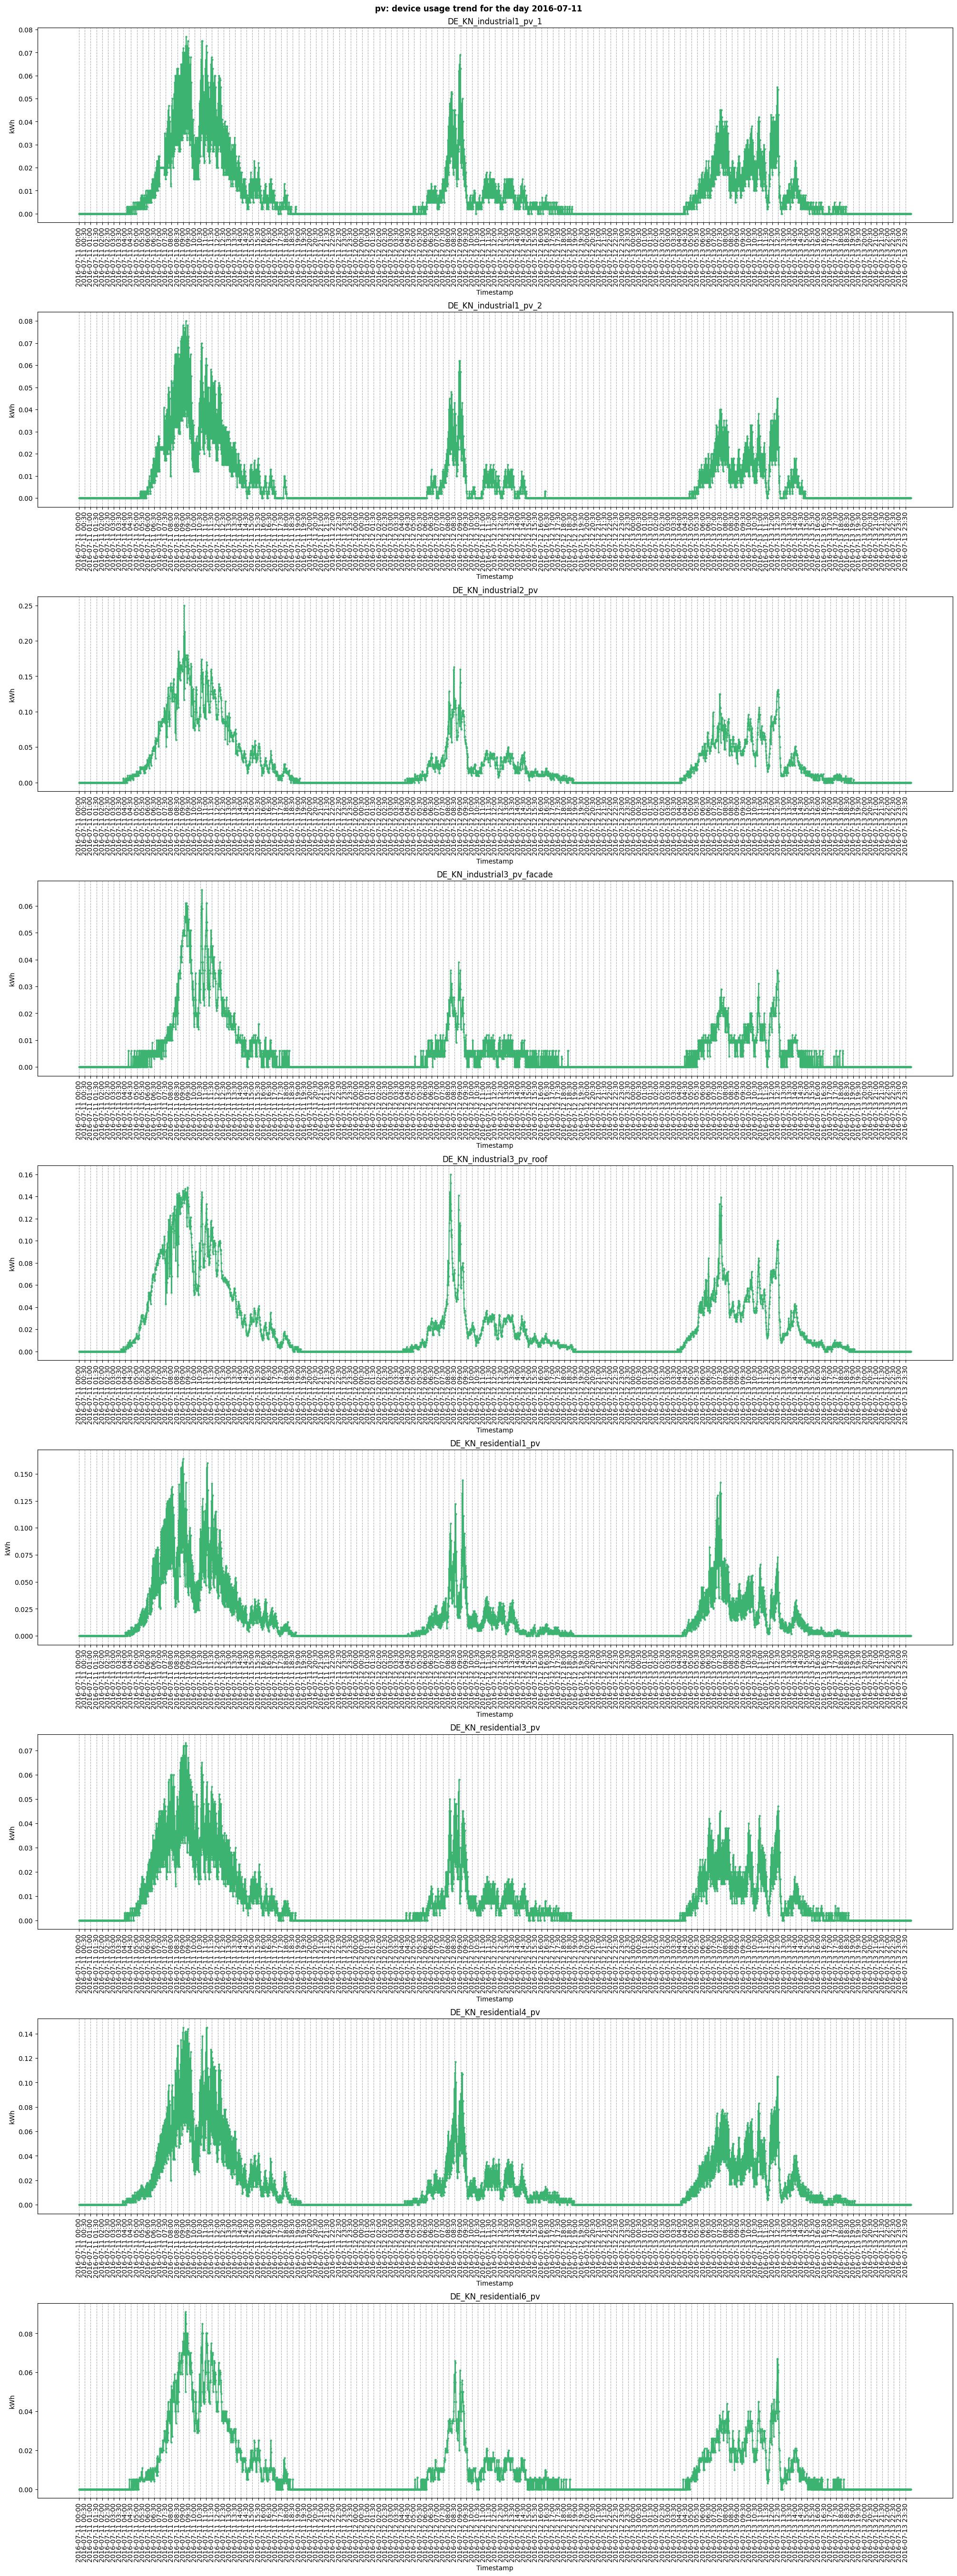

In [8]:
fig, subs = plt.subplots(len(DEVICES), 1, figsize=(1920/96, (576*len(DEVICES))/96), constrained_layout=True)
fig.suptitle(f"{ASSET_TYPE}: device usage trend for the day {str(DAY_START).split()[0]}", fontsize=12, fontweight='bold')

for dev in DEVICES:
    if len(DEVICES) == 1:
        sub1 = subs
    else:
        sub1 = subs[DEVICES.index(dev)]
    sub1.plot(filt['timestamp'], filt[dev], 'mediumseagreen', linewidth=1.5, marker='o', markersize=2)
    sub1.set_title(dev)
    sub1.set_xlabel(f"Timestamp")
    sub1.set_ylabel("kWh")
    #set time format and the interval of ticks (every 30 minutes):
    labels = [ts for ts in filt['timestamp'][::30]]
    sub1.set_xticks(labels)
    sub1.set_xticklabels(labels,rotation=90)
    sub1.grid(axis="x",linestyle="--")
    xformatter = md.DateFormatter('%Y-%m-%d %H:%M')
    sub1.xaxis.set_major_formatter(xformatter)

plt.show()

### Statistical analysis

Key statistics:

In [9]:
table = pd.DataFrame()
table.index = ['Mean', 'Median', 'Max', 'Min', 'StDev', 'MAD', 'Variance']
for column in data:
    table[column] = np.zeros(7)
    table[column][0] = data.mean()[column]
    table[column][1] = data.median()[column]
    table[column][2] = data.max()[column]
    table[column][3] = data.min()[column]
    table[column][4] = data.std()[column]
    table[column][5] = (data - data.mean()).abs().mean()[column] #mad
    table[column][6] = data.var()[column]
    
table

,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv
Mean,0.006248,0.004758,0.012563,0.004768,0.011153,0.009383,0.007765,0.013957,0.011639
Median,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,0.134000,0.120000,333.338000,0.504000,3.035000,0.245000,24.436000,0.287000,0.302000
Min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
StDev,0.016915,0.013040,0.357421,0.015789,0.032367,0.026770,0.074175,0.032517,0.027561
MAD,0.009849,0.007662,0.021234,0.007923,0.018326,0.014990,0.010949,0.020797,0.017609
Variance,0.000286,0.000170,0.127750,0.000249,0.001048,0.000717,0.005502,0.001057,0.000760


Covariance:

In [10]:
data.cov()

,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv
DE_KN_industrial1_pv_1,0.000286,0.000206,0.000357,0.000166,0.000371,0.000165,0.000156,0.000425,0.000374
DE_KN_industrial1_pv_2,0.000206,0.000170,0.000284,0.000127,0.000296,0.000134,0.000121,0.000326,0.000286
DE_KN_industrial2_pv,0.000357,0.000284,0.127750,0.000440,0.000948,0.000655,0.000246,0.000761,0.000640
DE_KN_industrial3_pv_facade,0.000166,0.000127,0.000440,0.000249,0.000452,0.000221,0.000105,0.000340,0.000286
DE_KN_industrial3_pv_roof,0.000371,0.000296,0.000948,0.000452,0.001048,0.000473,0.000252,0.000734,0.000619
DE_KN_residential1_pv,0.000165,0.000134,0.000655,0.000221,0.000473,0.000717,0.000100,0.000334,0.000280
DE_KN_residential3_pv,0.000156,0.000121,0.000246,0.000105,0.000252,0.000100,0.005502,0.000296,0.000273
DE_KN_residential4_pv,0.000425,0.000326,0.000761,0.000340,0.000734,0.000334,0.000296,0.001057,0.000762
DE_KN_residential6_pv,0.000374,0.000286,0.000640,0.000286,0.000619,0.000280,0.000273,0.000762,0.000760


Pearson Correlation:

In [11]:
data.corr(method='pearson')

,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_pv,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_residential1_pv,DE_KN_residential3_pv,DE_KN_residential4_pv,DE_KN_residential6_pv
DE_KN_industrial1_pv_1,1.000000,0.935340,0.059001,0.621750,0.677883,0.363870,0.124643,0.773150,0.802829
DE_KN_industrial1_pv_2,0.935340,1.000000,0.060892,0.616776,0.700628,0.384451,0.125178,0.769945,0.795709
DE_KN_industrial2_pv,0.059001,0.060892,1.000000,0.077910,0.081987,0.068469,0.009292,0.065507,0.065007
DE_KN_industrial3_pv_facade,0.621750,0.616776,0.077910,1.000000,0.885036,0.522670,0.089979,0.662510,0.657594
DE_KN_industrial3_pv_roof,0.677883,0.700628,0.081987,0.885036,1.000000,0.546279,0.105087,0.697872,0.693435
DE_KN_residential1_pv,0.363870,0.384451,0.068469,0.522670,0.546279,1.000000,0.050152,0.383823,0.379809
DE_KN_residential3_pv,0.124643,0.125178,0.009292,0.089979,0.105087,0.050152,1.000000,0.122703,0.133365
DE_KN_residential4_pv,0.773150,0.769945,0.065507,0.662510,0.697872,0.383823,0.122703,1.000000,0.850621
DE_KN_residential6_pv,0.802829,0.795709,0.065007,0.657594,0.693435,0.379809,0.133365,0.850621,1.000000
